# Assignment 10

Epoch 0, Loss: 0.6183
Epoch 1, Loss: 0.6055
Epoch 2, Loss: 0.5935
Epoch 3, Loss: 0.5821
Epoch 4, Loss: 0.5713
Epoch 5, Loss: 0.5611
Epoch 6, Loss: 0.5515
Epoch 7, Loss: 0.5423
Epoch 8, Loss: 0.5337
Epoch 9, Loss: 0.5255

Model Evaluation Metrics:
Accuracy: 0.5800
Precision: 0.8571
Recall: 0.5000
F1 Score: 0.6316


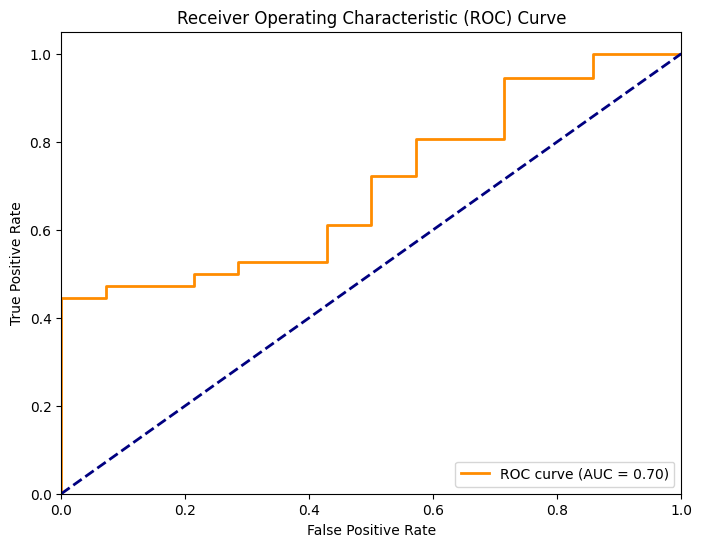

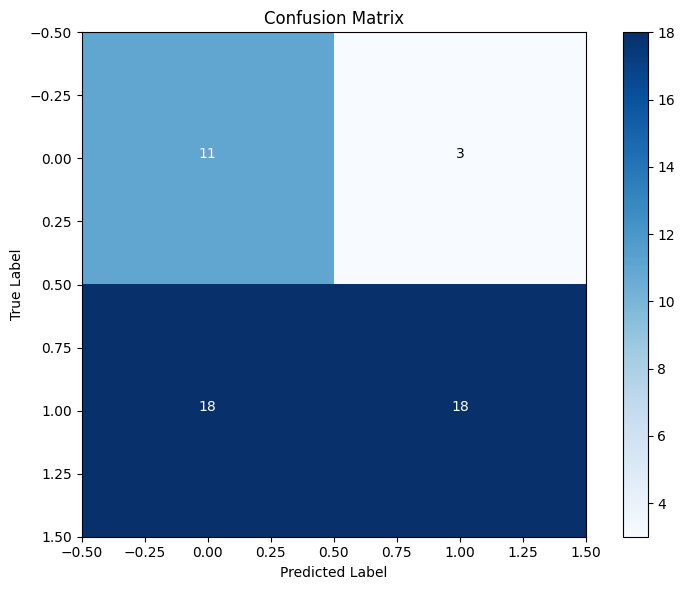

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def binary_cross_entropy_loss(Y_true, Y_pred):
    Y_pred = np.clip(Y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(Y_true * np.log(Y_pred) + (1 - Y_true) * np.log(1 - Y_pred))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def normalize_features(data):
    data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
    data['Age'] = (data['Age'] - data['Age'].mean()) / data['Age'].std()
    data['EstimatedSalary'] = (data['EstimatedSalary'] - data['EstimatedSalary'].mean()) / data['EstimatedSalary'].std()
    return data

def fit_logistic_regression(X, y, learning_rate, num_epochs):
    m, n = X.shape # number of samples, number of features

    np.random.seed(ord('ඞ'))
    W = np.random.rand(n)
    b = 0
    
    for epoch in range(num_epochs):
        z = np.dot(X, W) + b
        y_pred = sigmoid(z)
        
        dz = y_pred - y
        dw = (1/m) * np.dot(X.T, dz)
        db = (1/m) * np.sum(dz)
        
        W -= learning_rate * dw
        b -= learning_rate * db
        
        loss = binary_cross_entropy_loss(y, y_pred)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")
    
    return W, b

def predict(X, weights, bias, threshold=0.5):
    z = np.dot(X, weights) + bias
    probabilities = sigmoid(z)
    predictions = (probabilities >= threshold).astype(int)
    return predictions

def evaluate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print("\nModel Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

def plot_roc_curve(Y_true, Y_scores):
    fpr, tpr, _ = roc_curve(Y_true, Y_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

def main():
    data_train = pd.read_csv('train.csv')
    data_test = pd.read_csv('test.csv')

    # Normalize the features and handle categorical data
    data_train = normalize_features(data_train)
    data_test = normalize_features(data_test)

    # Extract features and labels
    X_train = data_train[['Gender', 'Age', 'EstimatedSalary']].values
    y_train = data_train['Purchased'].values
    X_test = data_test[['Gender', 'Age', 'EstimatedSalary']].values
    y_test = data_test['Purchased'].values

    # Train logistic regression model
    learning_rate = 0.1
    num_epochs = 10
    weights, bias = fit_logistic_regression(X_train, y_train, learning_rate, num_epochs)

    # Make predictions on the test set
    y_pred_test = predict(X_test, weights, bias)
    
    # Calculate and print evaluation metrics
    evaluate_metrics(y_test, y_pred_test)
    
    # Generate and plot ROC curve
    y_scores = sigmoid(np.dot(X_test, weights) + bias)  # Calculate probabilities for ROC
    plot_roc_curve(y_test, y_scores)
    
    # Generate and plot confusion matrix
    plot_confusion_matrix(y_test, y_pred_test)

# Run the main function
if __name__ == "__main__":
    main()